# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Best Practices for Full-code submissions
* The final notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
* The notebook should be run from start to finish in a sequential manner before submission.
* It is important to remove all warnings and errors before submission.
* The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb).
* Please refer to the FAQ page for common project-related queries.

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv("foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Checking the shape of the dataset to get the number of row and columns
print ("The Dataset has",df.shape[0], "of rows with",df.shape[1],"colunms")
       

The Dataset has 1898 of rows with 9 colunms


#### Observations:
The Dataset has 1898 of rows with 9 colunms

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- We can observe that there are 4 object datatypes columns and 5 numerical datatypes (1 float datatype and 4 integers datatype).
- All the columns have 1898 non-null values, which implies there aren't any null values present in the dataset.
- The ratings column is read as a object type but should be a numerical column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
#Investigating Rating column due to wrong datatype. using value_counts on the column to see what values are exists.
df["rating"].value_counts()   



Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

We can see 'not given' as a data entry 736 times therefore this is missing data, this is almost half the database

In [7]:
#The "not given" entity prevents the rating column from being numerical, to fix this need no convert it to NaN and covert the rating column to make it an float dtype
df["new_rating"]=df["rating"].replace("Not given",np.nan).astype(float) #created a new column new_rating for the corrected rating column to preserve original data and to cross check applied replace function.

In [8]:
#checking the data type of the new_rating column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   new_rating             1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


new_rating column is the rating column converted into a numerial column.

In [9]:
#the total amount of missing data in new_ratings column.
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                     0
food_preparation_time      0
delivery_time              0
new_rating               736
dtype: int64

#### Observations:
- new_ratings column has a numerical data type as expected
- There are no more "Not given" entries in the new_ratings column, they have all been replaced by NaN, orginally 736 Not given entries, there are now 736 null entries. Hence new_rating column has 1162 non-null values rather than 1898.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Checking stats summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
new_rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00


#### Observations:
- The minimum time it takes for food preperation is 20 mins
- The average time it takes for food prepertation is 27 mins
- The maximum time it takes or food preperation is 35 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# sum of null values for each column
pd.DataFrame({"Count":df.isnull().sum()[df.isnull().sum()>0],"Percentage":(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
new_rating,736,38.777661


#### Observations:
- There are 736 orders not rated in the database, which is 38.8% of the orders in the database.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
# let's explore how many customers there are
df["customer_id"].nunique()

1200

There are 1200 customers in the database.

In [13]:
# how many orders there are
df["order_id"].nunique()

1898

There are 1898 orders in the database.

In [14]:
# how many restaurants there are
df["restaurant_name"].nunique()

178

There are 178 restaurants in the database.

In [15]:
# how many cuisine types there are
df["cuisine_type"].nunique()

14

There are 14 different types of cuisines.

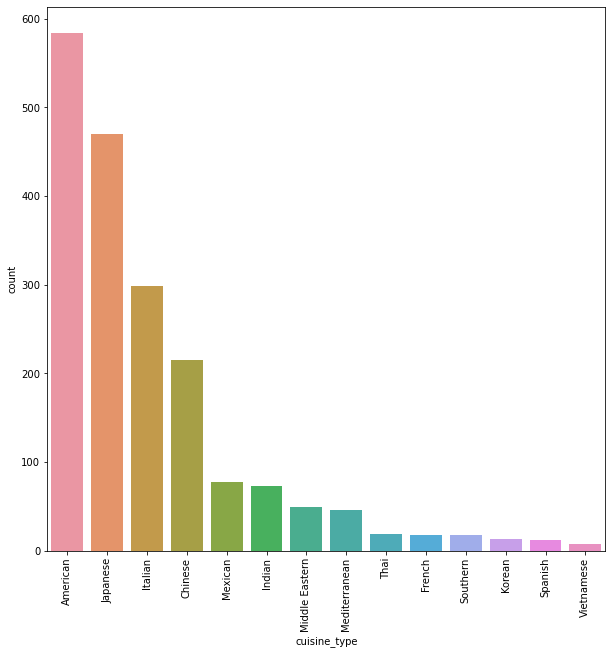

In [16]:
# how many of each type of cuisines there are using countplot
plt.figure(figsize =(10,10))
sns.countplot(x="cuisine_type",order = df["cuisine_type"].value_counts().index, data =df);
plt.xticks(rotation=90);

We can see that the most of the orders are from American, Japanese, Italian and Chinese cuisines.

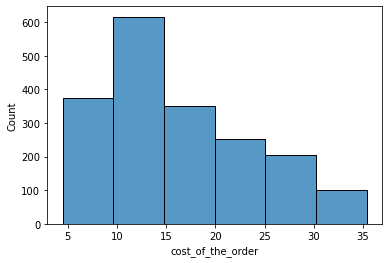

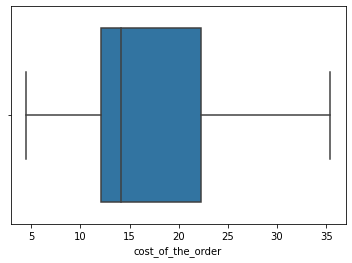

In [17]:
# for cost of order we can look at histogram and boxplot distribution
sns.histplot(x="cost_of_the_order", bins=6, data=df);
plt.show()

sns.boxplot(x="cost_of_the_order", data=df);


- Most of the orders cost around between 10 to 15 dollars.
- 75% of the orders cost lower than appx 23 dollars.
- The cost of orders is right skewed and 50% of the orders are priced at around 14 dollars.

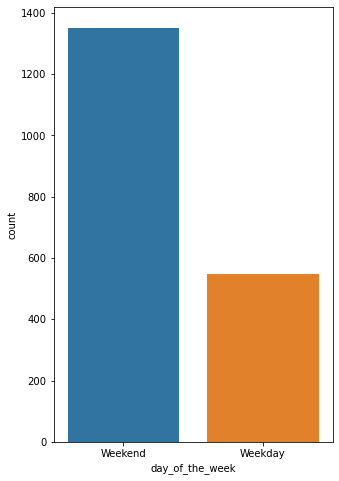

In [18]:
#for amount of orders on day of the week
plt.figure(figsize =(5,8))
sns.countplot(x="day_of_the_week", data=df);

The majority of the orders have taken place on the weekend (more than 50%).

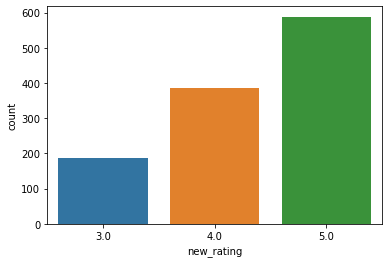

In [19]:
#how many of each rating given
sns.countplot(x="new_rating", data =df);
plt.show()

In [20]:
# dataframe showing the rating count and percentage.
a=df.groupby(["new_rating"])["new_rating"].count()

b=df.groupby(["new_rating"])["new_rating"].count()/1162*100  #1162 is the sum of the ratings count.

pd.DataFrame({"Rating_count":a,"Percentage":round(b).astype(int)})

,Rating_count,Percentage
new_rating,,
3.0,188,16
4.0,386,33
5.0,588,51


- 84% of the orders have recieved a rating higher than 3.
- 51% of the orders have a rating of 5.

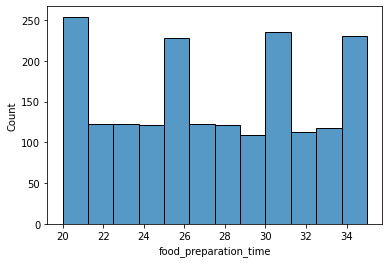

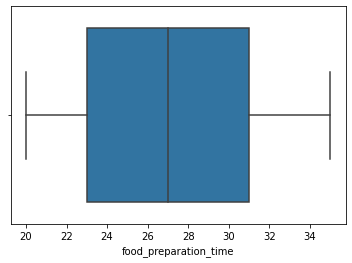

In [21]:
# looking at the distrubtion of data for food preparation time
sns.histplot(x="food_preparation_time", data=df);
plt.show()

sns.boxplot(x="food_preparation_time", data=df);

- There is no skewness in the food prepartion time.
- 50% of the food is prepared within 27mins.
- 75% of the food is prepared with 31mins.

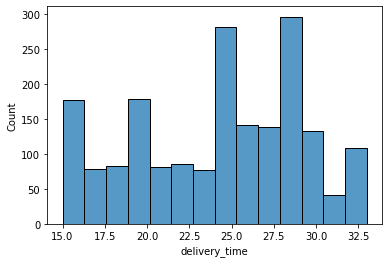

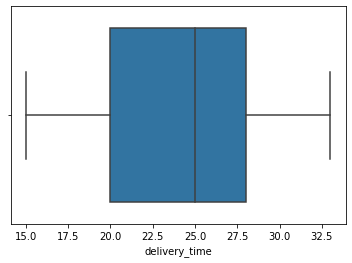

In [22]:
# looking at the distrubtion of data for food delivery time
sns.histplot(x="delivery_time", data=df);
plt.show()

sns.boxplot(x="delivery_time", data=df);

- 75% of the deliveries are done within 28 mins
- 50% of the deliveries are completed in 25mins

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Grouping by restaurant name and sorting based on the count of unique orders in descending order, then selecting top 5 results.
Top5 = df.groupby("restaurant_name").nunique()[["order_id"]].sort_values("order_id", ascending=False).reset_index()[:5]

Top5

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


<Figure size 1440x432 with 0 Axes>

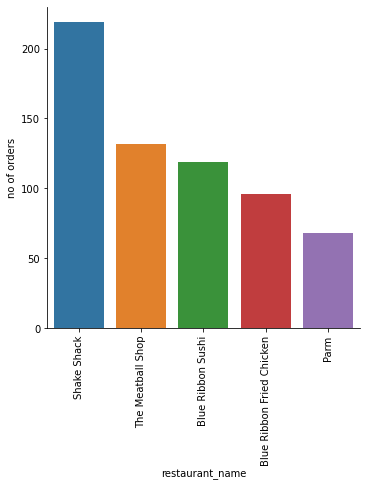

In [24]:
# visiualisation of the top 5 restaurants, relabelling of the Y axis
plt.figure(figsize=(20,6))
sns.catplot(data=Top5,x= "restaurant_name", y="order_id", kind="bar");
plt.xticks(rotation=90);
plt.ylabel("no of orders");

#### Observations:
The top 5 restaurants in terms of the number of orders received are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.	

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [25]:
# creating a weekend variable to select row containing weekend
weekend = df[df["day_of_the_week"]=="Weekend"]

# group the count of weekend occurances by cuisine type.
weekend.groupby("cuisine_type")["day_of_the_week"].count().sort_values(ascending=False)


cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Spanish            11
Southern           11
Korean             11
Vietnamese          4
Name: day_of_the_week, dtype: int64

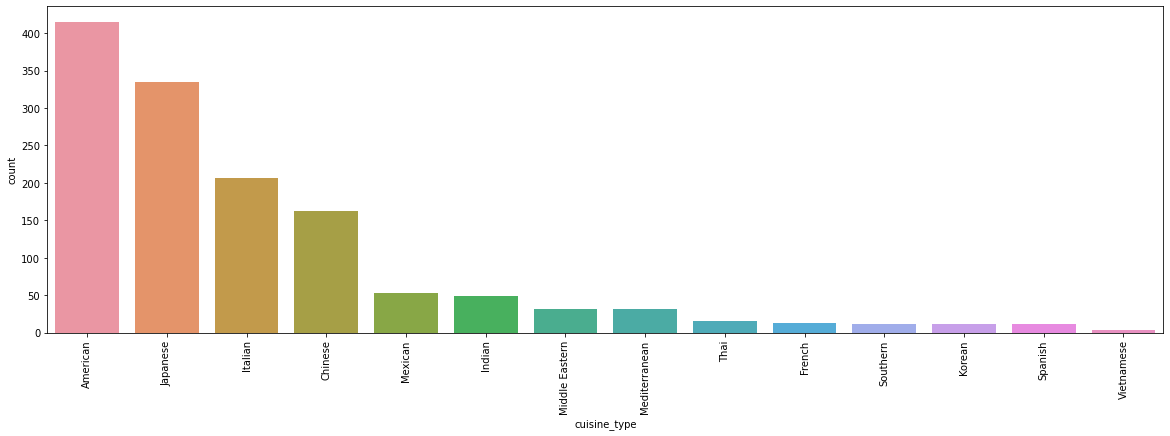

In [26]:
# creating a count plot of the most popular cuisine on the weekend
plt.figure(figsize=(20,6))
sns.countplot(x="cuisine_type",order = weekend["cuisine_type"].value_counts().index , data=weekend);
plt.xticks(rotation=90);

#### Observations:
The most popular cuisine on the weekends is American with 415 orders, followed by the Japanese and Italian cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
# creating plus20 variable for order cost more than 20 dollars. Shape[0], no of rows in data to work out rounded percentage
plus20 = df[df["cost_of_the_order"]>20]
round(plus20.shape[0]/df.shape[0]*100)

29

#### Observations:
29% percent of the orders in the dataset cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
# using the mean() on the delivery time column
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24 mins and 16 secs.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
# Could use value counts for a quick answer
pd.DataFrame(df["customer_id"].value_counts()[:5])


,customer_id
52832,13
47440,10
83287,9
250494,8
259341,7


In [30]:
"""This method uses a for loop to iterate through a dataframe and print the results."""

# selecting the order and customer IDs from the database
orders = df[["order_id","customer_id"]]

# group by custormer ID and sort by count of orders, then keep the top five records
Top5 =pd.DataFrame(orders.groupby("customer_id")["order_id"].count().sort_values(ascending=False)[:5])

# for loop to iterate through each row and print the index and column value resprectively.
for c in Top5.index:
    Total = Top5["order_id"][c]  #order ID count coulmn related to customer ID
    print("CustomerID:",c,"Total orders",Total)
 

CustomerID: 52832 Total orders 13
CustomerID: 47440 Total orders 10
CustomerID: 83287 Total orders 9
CustomerID: 250494 Total orders 8
CustomerID: 65009 Total orders 7


#### Observations:
CustomerID: 52832 Total orders 13

CustomerID: 47440 Total orders 10

CustomerID: 83287 Total orders 9

CustomerID: 250494 Total orders 8

CustomerID: 65009 Total orders 7

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


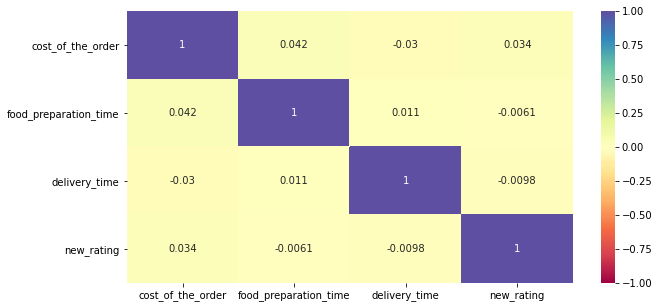

In [31]:
# Heatmap correlation of dataset with order id and customer id dropped.
dfcorr= df.drop(["order_id","customer_id"], axis=1)
plt.figure(figsize=(10,5))
sns.heatmap(dfcorr.corr(),annot=True,cmap="Spectral",vmin=-1,vmax=1)
plt.show()

There are no very strong relationship between the numerical variables however:
- The delivery time is negativey impacted by the cost of order.
- The rating is positively impacted by the cost of the order.
- As the cost of the order increases so does the food preparation time.

In [32]:
# Creating a dataframe for the top 10 restaurants with the highest income. 
R_income=pd.DataFrame(df.groupby("restaurant_name")["cost_of_the_order"].sum().sort_values(ascending=False).reset_index())[:11]

R_income

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


<Figure size 1440x432 with 0 Axes>

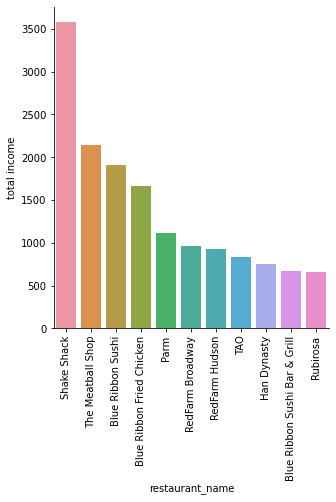

In [33]:
# Plot of the Top10 restaurants income.
plt.figure(figsize=(20,6))
sns.catplot(x= "restaurant_name", y="cost_of_the_order", kind="bar",data=R_income);
plt.xticks(rotation=90);
plt.ylabel("total income");

The Shake Shack restaurant has the most amount of income form the orders at \$3579.53 , followed by The Meatball Shop , and Blue Ribbon Sushi.

<Figure size 1080x504 with 0 Axes>

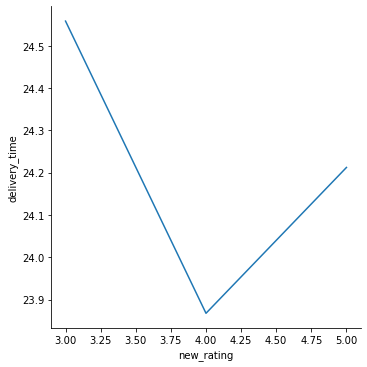

,new_rating,delivery_time
new_rating,1.000000,-0.009804
delivery_time,-0.009804,1.000000


In [34]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.relplot(x = "new_rating", y = "delivery_time",kind="line", ci=None, data = df)
plt.show()

# correlation between rating and delivery time
df[["new_rating","delivery_time"]].corr()

The rating has a negative very weak correlation with with delivery time.

<Figure size 1080x504 with 0 Axes>

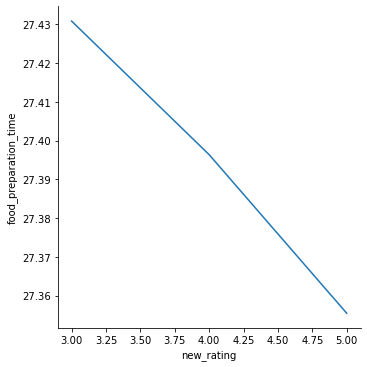

,new_rating,food_preparation_time
new_rating,1.000000,-0.006083
food_preparation_time,-0.006083,1.000000


In [35]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.relplot(x = "new_rating", y = "food_preparation_time",kind="line", ci=None, data = df)
plt.show()
# correlation between rating and food preparation time
df[["new_rating","food_preparation_time"]].corr()

The rating has a negative very weak correlation with food preperation time.

<Figure size 1080x504 with 0 Axes>

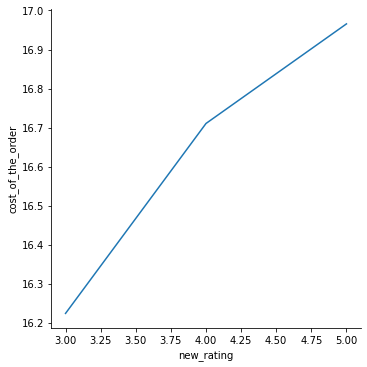

,new_rating,cost_of_the_order
new_rating,1.000000,0.033983
cost_of_the_order,0.033983,1.000000


In [36]:
# Relationship between rating and order cost
plt.figure(figsize=(15, 7))
sns.relplot(x = "new_rating", y = "cost_of_the_order",kind="line", ci=None, data = df)
plt.show()

# correlation between rating and food preparation time
df[["new_rating","cost_of_the_order"]].corr()

The rating has a positive weak correlation with the cost of the order.

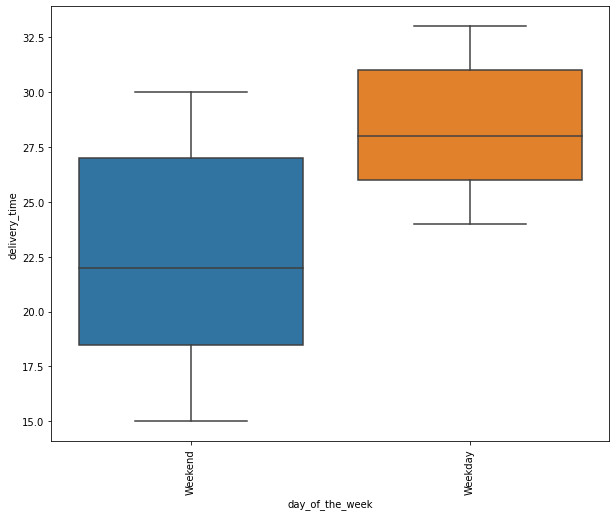

In [37]:
# Boxplot to display how the delivery time varies depending on day of the week.
plt.figure(figsize=(10,8))
sns.boxplot(x="day_of_the_week",y="delivery_time",data=df)
plt.xticks(rotation=90)
plt.show()

- The 50% of the orders taken on the weekend are delivered about 5mins faster than those on the weekday.
- 75% of the orders on the weekend are delivered within ~27mns compared to ~ 31mins on the weekday.
- In general weekend delivery are faster than that on the weekday.

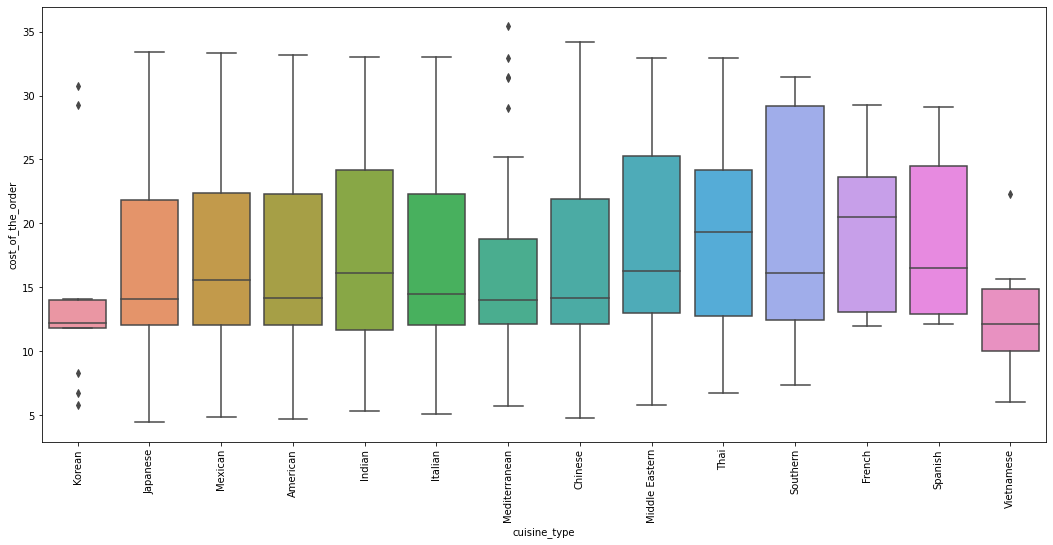

In [38]:
# Boxplot to display how the order cost varies with different cuisine types.
plt.figure(figsize=(18,8))
sns.boxplot(data=df,x="cuisine_type",y="cost_of_the_order")
plt.xticks(rotation=90)
plt.show()

- 50% of all orders arcoss all cuisine types are less than 21 dollars
- Mediterranean cuisine has recorded the highest priced order.

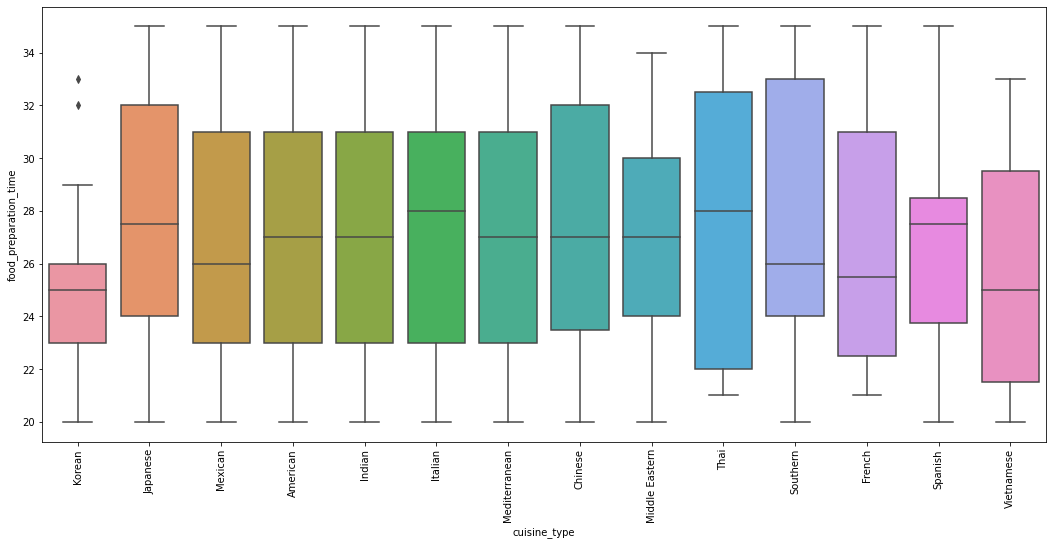

In [39]:
# Boxplot to display how the food preperation times varies with different cuisine types.
plt.figure(figsize=(18,8))
sns.boxplot(data=df,x="cuisine_type",y="food_preparation_time")
plt.xticks(rotation=90)
plt.show()

- Korean food is generally the fastest to prepare.
- 50% of orders in all cuisine types prepared food in less than 29mins.
- The minimum time it takes to prepare food is ~20mins across all cuisines.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [40]:
# Creating a dataframe for the restaurants with the count of ratings
R_count_R=pd.DataFrame(df.groupby("restaurant_name")["new_rating"].count().sort_values(ascending=False).reset_index())

# Creating a dataframe for the restaurants with the mean of ratings
R_mean_R=df.groupby("restaurant_name")["new_rating"].mean()

# Merging the count and mean of restaurants into one dataframe.
PromoDf=pd.merge(R_count_R,R_mean_R,how="inner",on="restaurant_name")

# renaming column labels
PromoDf.rename(columns = {"new_rating_x":"rating_count", "new_rating_y":"rating_avg"}, inplace = True)

In [41]:
# Selecting row in dataframe based promotional conditions
Promo= PromoDf[(PromoDf["rating_count"]> 50) & (PromoDf["rating_avg"]>4)]

Promo


,restaurant_name,rating_count,rating_avg
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
The restaurants fulfilling the criteria to get the promotional offer are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
# Creating an if-else lambda function to charge to applicable order costs
MaxCharge = lambda a: a*0.25 if a>20 else (a*0.15 if a>5 else None)

# applying the function to the order cost series, summing the values and rounding to 2 dp.
net_rev=df["cost_of_the_order"].apply(MaxCharge).sum().round(2)

# print statement for the result.
print("The net revenue generated by the company across all orders is: ${}".format(net_rev))

The net revenue generated by the company across all orders is: $6166.3


#### Observations:
The net revenue generated by the company across all orders is: \$6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [43]:
# creating a column for the time it takes to deliver and prep the food 
df["Order_complete_time"]= df["delivery_time"]+ df["food_preparation_time"]

# Calculating the percentage of order that take more than 60mins
percent_ovr60 = round(df[df["Order_complete_time"]>60].shape[0]/df.shape[0]*100)

print("The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is {}%".format(percent_ovr60))

The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 11%


#### Observations:
The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 11%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
# selecting the row that are for weekends and calculating the mean delivery time.

Weekend_mean=(df[df["day_of_the_week"] == "Weekend"]["delivery_time"].mean())

# selecting the row that are for weekends and calculating the mean delivery time.

Weekday_mean=(df[df["day_of_the_week"] == "Weekday"]["delivery_time"].mean())

print("The mean weekend delivery time is appx. {}mins \nThe mean weekday delivery time is appx. {}mins".format(round(Weekend_mean), round (Weekday_mean)))

The mean weekend delivery time is appx. 22mins 
The mean weekday delivery time is appx. 28mins


#### Observations:
The mean weekend delivery time is appx. 22mins

The mean weekday delivery time is appx. 28mins

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The dataset consisted of nearly 19K food orders made by 1.2K customers, the information is taken from 14 different cusines, spanning over 178 restaurants.
The main focus is to help the aggregator company gain insights about the demand of different restaurants which will help them in enhancing their customer experience.
Good ratings, number of ratings, number of orders, combined with cusine type could help to determine the demand and popularity of resturants.
Upon this analysis we have been able to conclude that:
*  Most orders take place on the weekend.
*  The rating of the order is not heavily impacted by the delivery time.
*  84% o the orders have a rating higher than 3.
*  The top 5 restaurants in terms of the number of orders received are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
*  The most popular cuisine on the weekends is American with 415 orders, followed by the Japanese and Italian cuisine.
*  The Shake Shack restaurant has the most amount of income form the orders at 3579.53 dollars, followed by The Meatball Shop and Blue Ribbon Sushi.
*  The restaurants fulfilling the criteria to get the promotional offer are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.
* The net revenue generated by the company across all orders is: 6166.3 dollars.

### Recommendations:

*  The Shack Shake restaurant is the most in demand resturant by number of orders and income. Having promotions for this restaurant would likely increase the company's net revenue.
*  The most in demand cuisine is American followed by Japanese and Itallian. There the app can focus it's advertisement on these type of cuisines.
* Only 29% of orders cost more than 20 dollars. That means the company is only capatilising on a third of their clients orders at a charge of 25%. To increase revenue the company may want to review the 20 dollar threshold for the maxiumum charge.
* Create a solution to ensure that more uses are likely to rate an order on the app to avoid missing data.
* More data to include all customers on the database (assuming this is a sample) and use a machine learning model to make a recommendations system target promotions towards specific customers based on there history of orders.

### Further Analysis that can be done:

*  We can explore how the rating vary with restaurants to see if there is a correlation with the demand.
*  We can explore demographic of the area where the restaurants are to gain a better understanding if ethnicity has a baring on the demand of a restaurant.

---